In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [97]:
dir_path = "~/movielens/ralf"
user_features_path = f"{dir_path}/user_features.csv"
movie_features_path = f"{dir_path}/movie_features.csv"
ratings_path = f"{dir_path}/ratings.csv"

In [98]:
def get_features(file_path):
    df = pd.read_csv(file_path)
    features = dict()
    for row in df.itertuples():
        features[row.id] = np.array(eval(row.features))
    return features 

In [99]:
def get_feature_update(features, row):
    features[row.user_id] = np.array(eval(row.user_features))

In [100]:
user_features = get_features(user_features_path)
movie_features = get_features(movie_features_path)

In [101]:
test_data = pd.read_csv(ratings_path)

In [104]:
experiment_path = "~/experiment_results/14"
feature_updates = pd.read_csv(f"{experiment_path}/results_workers_1_fifo_learningrate_0.02_userfeaturereg_0.01.csv")

In [106]:
len(test_data)

49271

In [105]:
len(feature_updates)

95814

In [89]:
def predict_rating(user_feature, movie_feature):
    return user_feature.dot(movie_feature.T)

def compute_test_mse(user_features, movie_features):
    predictions = []
    ratings = []
    count = 0
    for row in test_data.itertuples():
        user_id = row.user_id
        movie_id = row.movie_id
        rating = row.rating
        predictions.append(predict_rating(user_features[user_id], movie_features[movie_id]))
        ratings.append(rating) 
    mse = mean_squared_error(ratings, predictions)
    return mse

def compute_improvement():
    count = 0
    predictions = []
    ratings = []
    max_timestamp = max(feature_updates['timestamp'])
    print(max_timestamp, len(feature_updates), len(test_data))
    while count <= max_timestamp:
        feature_update_ts = feature_updates[feature_updates['timestamp'] == count] 
        print(len(feature_update_ts))
        for row in feature_update_ts.itertuples():
            user_features[row.user_id] = np.array(eval(row.user_features))
        query_ts = test_data[test_data['timestamp'] == count]
        print(len(query_ts))
        for row in query_ts.itertuples():
            user_id = row.user_id
            movie_id = row.movie_id
            rating = row.rating
            predictions.append(predict_rating(user_features[user_id], movie_features[movie_id]))
            ratings.append(rating)
        count += 1
    mse = mean_squared_error(ratings, predictions)
    return mse

In [90]:
mse = compute_improvement()
print(mse)

23 95931 49271
3998
1999
4000
2000
4000
2000
4000
2000
4000
2000
4000
2000
4000
2000
4000
2000
4000
2000
4000
2000
4000
2000
4000
2000
4000
2000
4000
2000
4000
2000
4000
2000
4000
2000
4000
2000
4000
2000
4000
2000
4000
2000
4000
2000
4000
2000
3933
2000
0.7623677183192678


In [81]:
def plot_learning_curve(mse):
        """visualize the training/testing loss"""
        linewidth = 3
        plt.plot(mse, label = 'Ralf', linewidth = linewidth)
        plt.xlabel('iterations')
        plt.ylabel('MSE')
        plt.legend(loc = 'best')

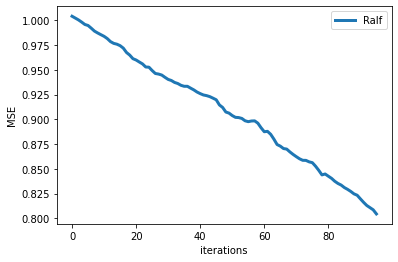

In [82]:
plot_learning_curve(mse)